In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import collections
import pathlib
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow import keras

In [2]:
tfds.disable_progress_bar()


def plot_graphs(history, metric):   #define a function to plot the history graph with accuracy and loss
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
#batch_size = 32
seed = 42  #set seed

train_dataset = preprocessing.text_dataset_from_directory(
    'bbc', 
#    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 2225 files belonging to 5 classes.
Using 1780 files for training.


In [4]:
test_dataset = preprocessing.text_dataset_from_directory(
    'bbc',
#    batch_size=batch_size,
    validation_split=.2,
    subset='validation',
    seed=seed)

Found 2225 files belonging to 5 classes.
Using 445 files for validation.


In [5]:
VOCAB_SIZE=10000 
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [6]:
vocab = np.array(encoder.get_vocabulary())

In [7]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=128,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True) # set callbacks

In [10]:
history = model.fit(train_dataset, epochs=50,
                    validation_data=test_dataset, 
                    validation_steps=10,
                    callbacks=earlystopping_cb)

Epoch 1/50
56/56 [==============================] - 43s 768ms/step - loss: 1.4628 - accuracy: 0.4051 - val_loss: 0.9432 - val_accuracy: 0.7125
Epoch 2/50
56/56 [==============================] - 46s 814ms/step - loss: 0.3941 - accuracy: 0.9225 - val_loss: 0.1909 - val_accuracy: 0.9438
Epoch 3/50
56/56 [==============================] - 52s 930ms/step - loss: 0.0390 - accuracy: 0.9904 - val_loss: 0.1534 - val_accuracy: 0.9531
Epoch 4/50
56/56 [==============================] - 52s 924ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.1584 - val_accuracy: 0.9469
Epoch 5/50
56/56 [==============================] - 53s 944ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9531
Epoch 6/50
56/56 [==============================] - 54s 963ms/step - loss: 4.6325e-04 - accuracy: 1.0000 - val_loss: 0.2111 - val_accuracy: 0.9438
Epoch 7/50
56/56 [==============================] - 48s 862ms/step - loss: 3.0465e-04 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy

In [11]:
test_loss, test_acc = model.evaluate(test_dataset) #result evaluation 

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

14/14 [==============================] - 1s 90ms/step - loss: 0.1577 - accuracy: 0.9573
Test Loss: 0.15773524343967438
Test Accuracy: 0.9573033452033997


(0.0, 1.535943359227531)

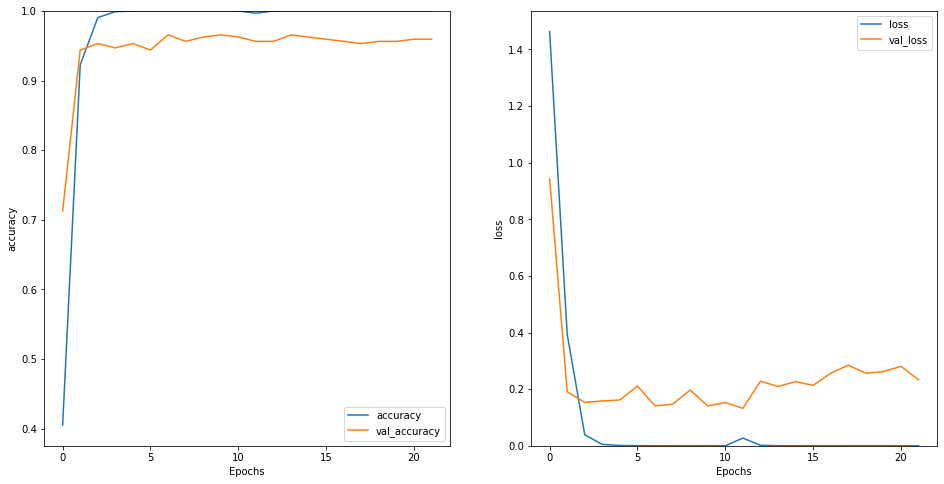

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)